In [1]:
from config_path import add_to_sys_path
add_to_sys_path()  # Call the function to add path

import numpy as np
from sympy.physics.wigner import wigner_3j,wigner_6j
#import sympy as sy
#from numpy import linalg as LA
from IPython.display import Latex,display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette('terrain')
from YbOH_energy_levels_symbolic import YbOHLevels
np.set_printoptions(precision=5, suppress=True)
%matplotlib inline
import time
#import torch

In [32]:
t0 = time.perf_counter()
X010_174 = YbOHLevels.initialize_state('174', 'X010',[1], M_values = 'custom', I = [0,1/2],S=1/2,M_range=[0], round=10)
t1 = time.perf_counter()
elapsed = t1 - t0
print(elapsed, 'sec')

0.07573730000012802 sec


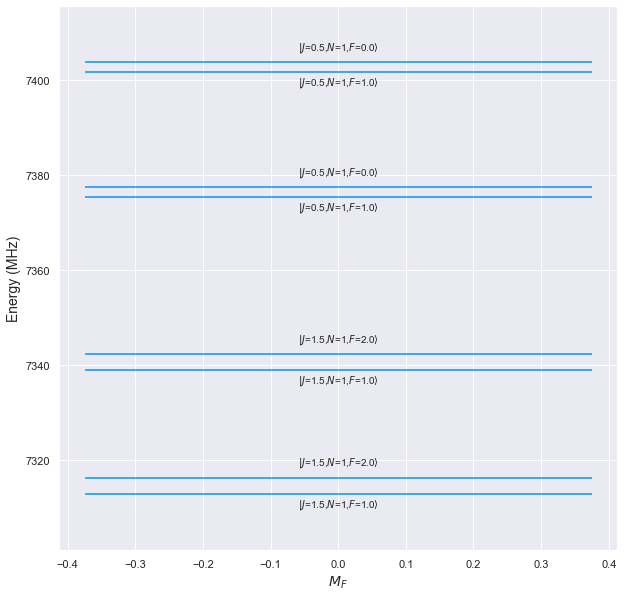

In [33]:
X010_174.display_levels(10,1e-6,'F',label_q = ['J','N','F'],alt_label=True)

In [41]:
Bz = np.linspace(0.0,100,10001)
Ez = np.linspace(0.0,5000,10001)

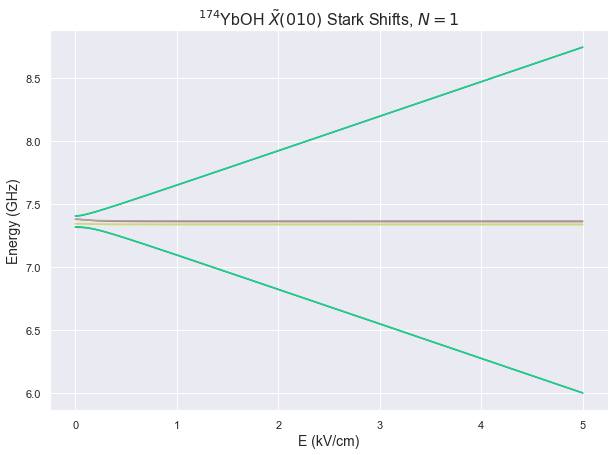

In [42]:
X010_174.StarkMap(Ez,0.5,plot=False)
X010_174.plot_evals_EB('E',kV_kG=True,GHz=True)

In [43]:
X010_174.evals_E[-1]

array([5996.75608, 5998.15605, 7331.71427, 7336.86449, 7357.72061,
       7362.87057, 8741.68207, 8743.08212])

In [25]:
t0 = time.perf_counter()
Bslices = X010_174.EB_grid(Ez,Bz,PTV=True,E_or_B_first='E',output=True,EDM_or_MQM='MQM')
t1 = time.perf_counter()
elapsed = t1 - t0
print(elapsed, 'sec')

KeyboardInterrupt: 

In [28]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_1404/368100332.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(*mesh,Bslices[1][i],shading='auto',cmap='bwr',norm=TwoSlopeNorm(0))
C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_1404/368100332.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


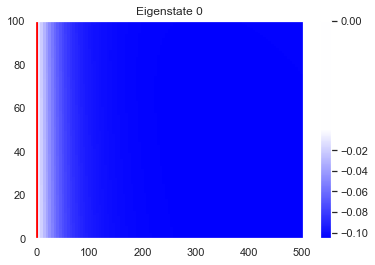

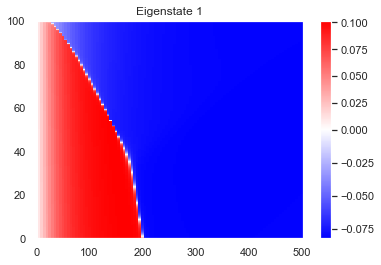

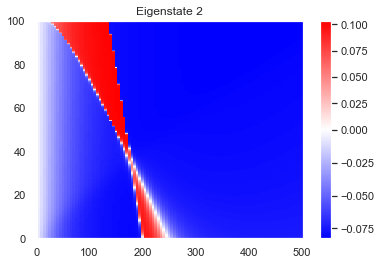

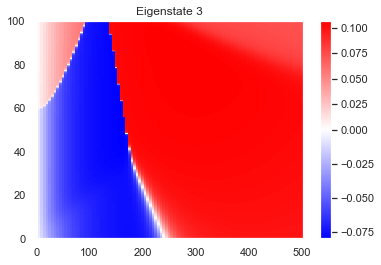

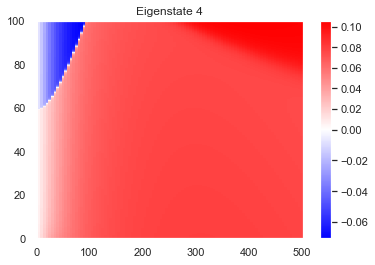

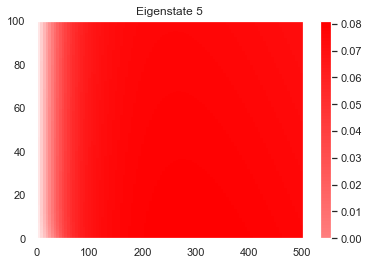

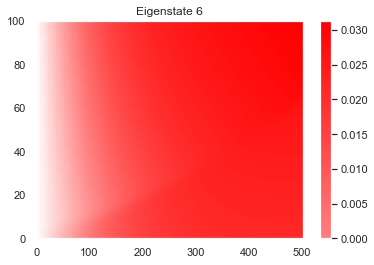

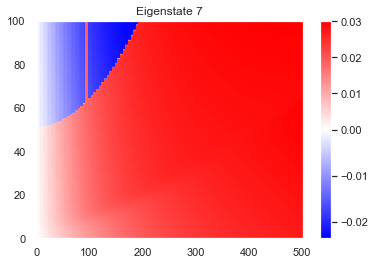

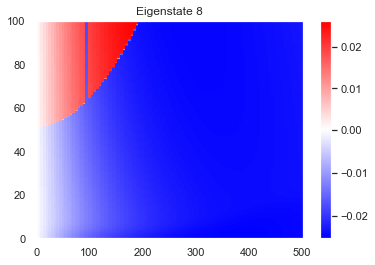

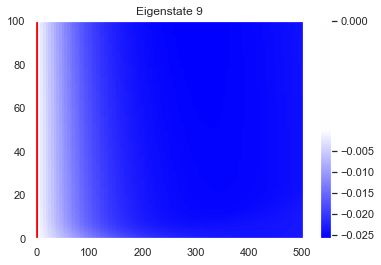

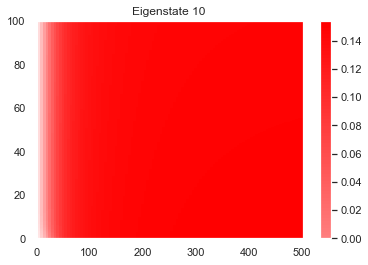

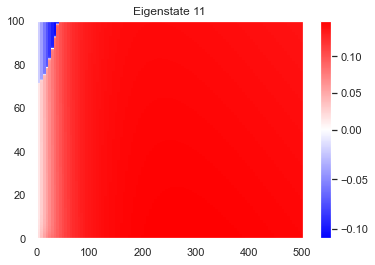

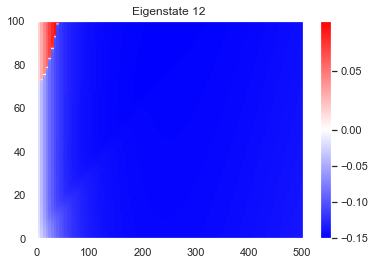

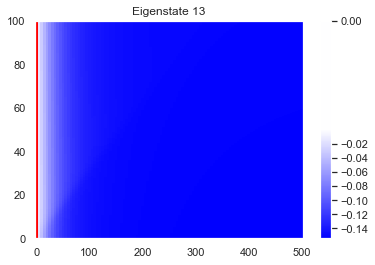

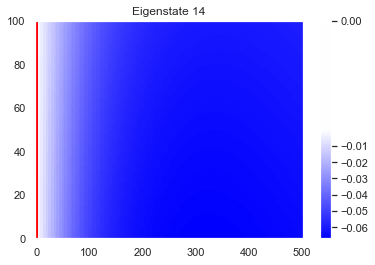

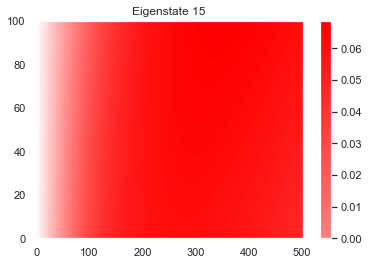

In [29]:
from matplotlib.colors import TwoSlopeNorm
for i in range(len(Bslices[0])):
    plt.figure()
    plt.pcolormesh(*mesh,Bslices[1][i],shading='auto',cmap='bwr',norm=TwoSlopeNorm(0))
    plt.colorbar()
    plt.title('Eigenstate {}'.format(i))

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_1404/1862772580.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(*mesh,Bslices[0][i],shading='auto',cmap='bwr')
C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_1404/1862772580.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


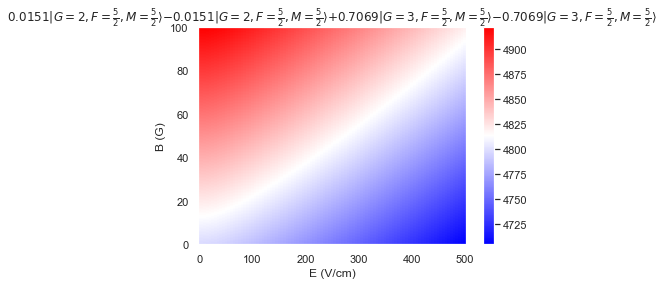

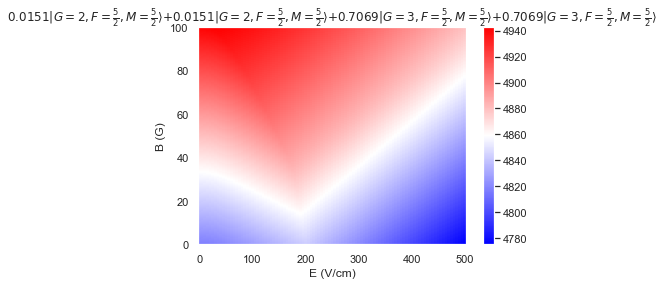

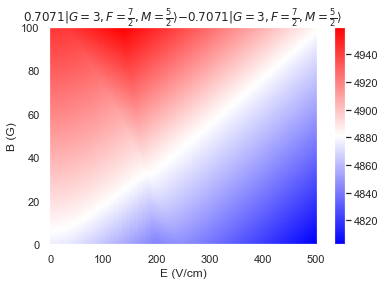

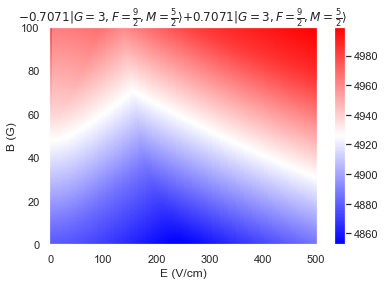

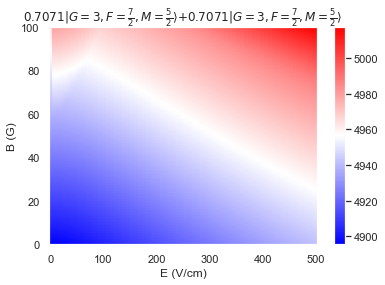

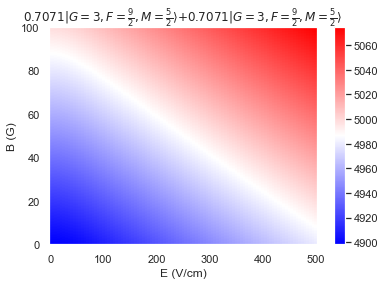

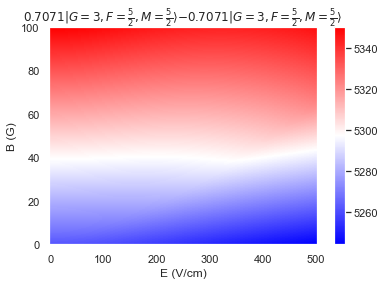

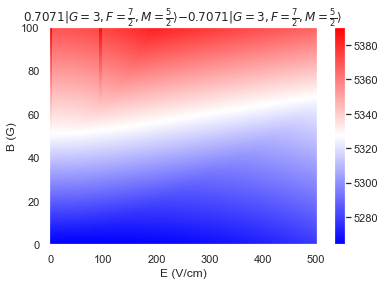

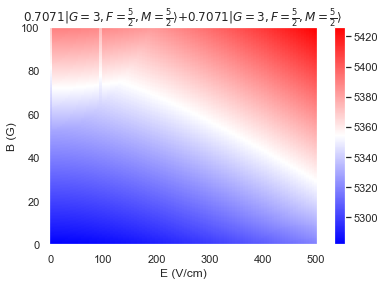

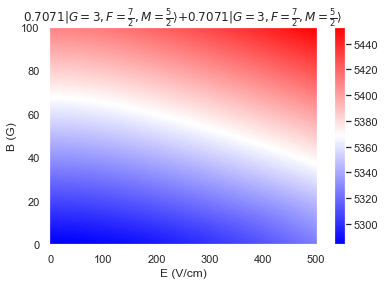

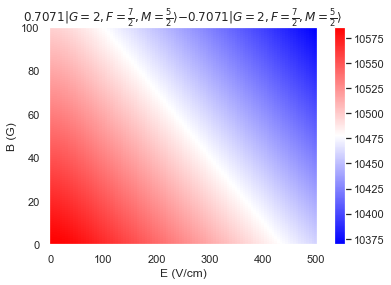

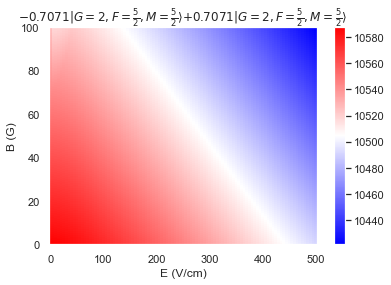

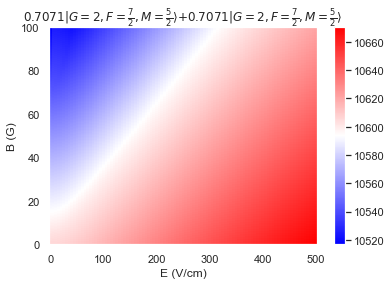

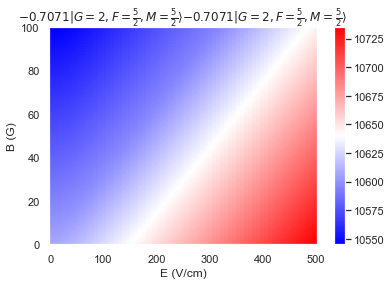

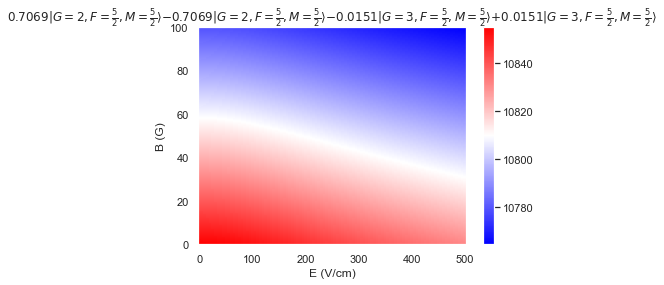

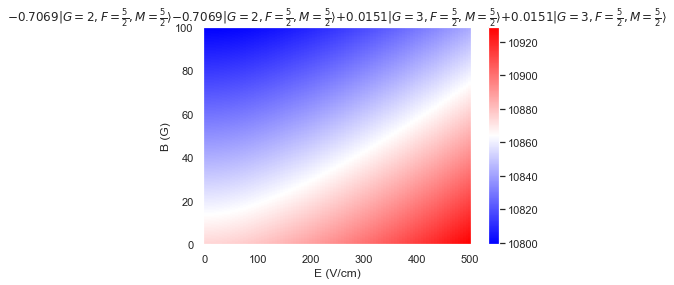

In [30]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
for i in range(len(Bslices[0])):
    plt.figure()
    plt.pcolormesh(*mesh,Bslices[0][i],shading='auto',cmap='bwr')
    plt.colorbar()
    plt.title(X010_174.gen_state_str(i,round=4,label_q=['G','F','M']))
    plt.xlabel('E (V/cm)')
    plt.ylabel('B (G)')

In [145]:
evals8,evecs8 = X010_174.ZeemanMap(Bz,Ez_val=8,output=True)

In [144]:
evals9,evecs9 = X010_174.ZeemanMap(Bz,Ez_val=9,output=True)

(7335.0, 7345.0)

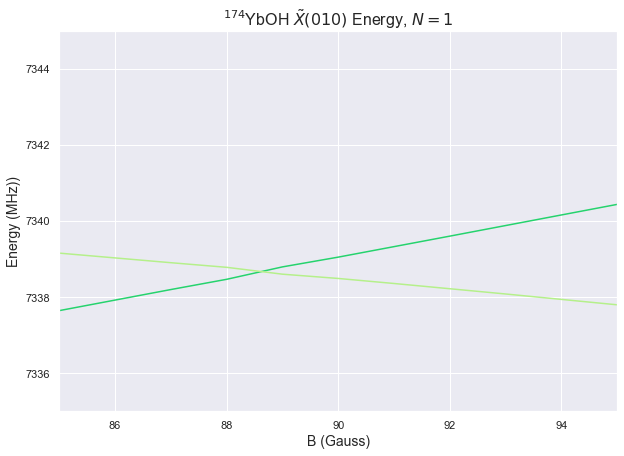

In [224]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(evals8.T):
    plt.plot(trace)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Energy, $N=1$',fontsize=16);
plt.xlim(85,95)
plt.ylim(7335,7345)

In [204]:
def state_ordering(evecs_old,evecs_new,step=None,round=8):
    if step is None:
        step = 1
    overlap = np.round(abs(evecs_old@evecs_new.T)**2,round)     #Essentially a matrix of the fidelities: |<phi|psi>|
    #calculate trace distance
    # for o in overlap:
    #     for _o in o:
    #         if (_o>1):
    #             print('OVERLAP BIGGER THAN 1', _o)
    dist = abs(1-overlap)/step**2
    print(dist)
    ordering = np.array([dist[i,:].argmin() for i in range(len(evecs_old))])
    print([dist[i,:].argmin() for i in range(len(evecs_old))])
    return ordering

In [229]:
state_ordering(evecs9[88],evecs9[89])
state_ordering(evecs8[88],evecs8[89])

[[0.00001 1.      1.      1.      0.99999 1.     ]
 [1.      0.46862 0.53138 1.      1.      1.     ]
 [1.      0.53139 0.46863 1.      1.      0.99999]
 [1.      1.      1.      0.      1.      1.     ]
 [0.99999 1.      1.      1.      0.00001 1.     ]
 [1.      0.99999 1.      1.      1.      0.00001]]
[0, 1, 2, 3, 4, 5]
[[0.00001 1.      1.      1.      0.99999 1.     ]
 [1.      0.36428 0.63572 1.      1.      1.     ]
 [1.      0.63572 0.36429 1.      1.      0.99999]
 [1.      1.      1.      0.      1.      1.     ]
 [0.99999 1.      1.      1.      0.00001 1.     ]
 [1.      1.      0.99999 1.      1.      0.00001]]
[0, 1, 2, 3, 4, 5]


array([0, 1, 2, 3, 4, 5], dtype=int64)

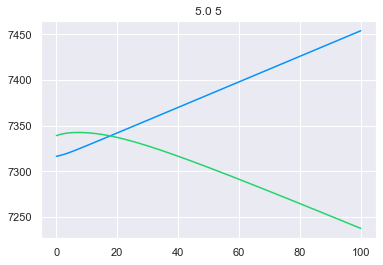

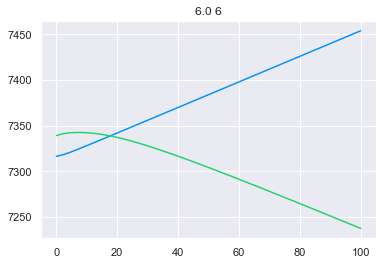

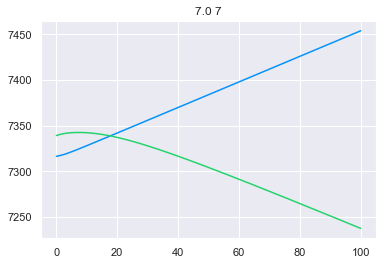

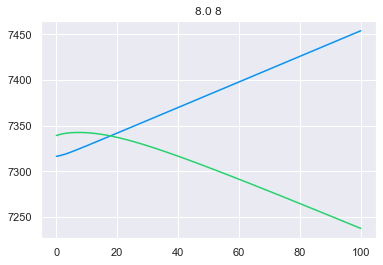

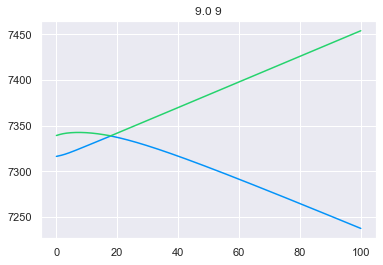

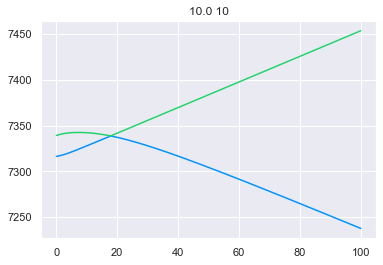

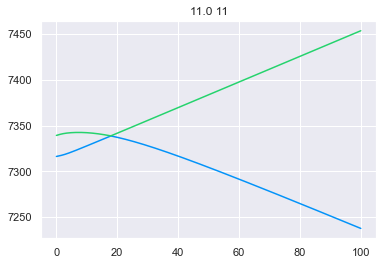

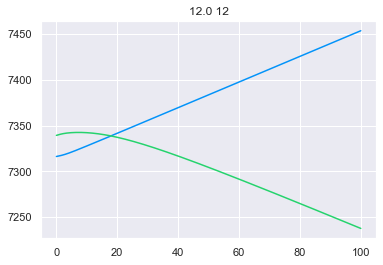

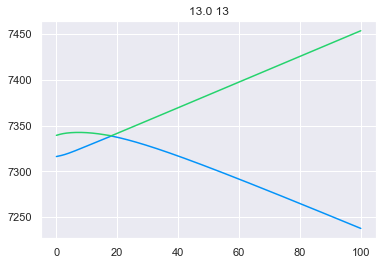

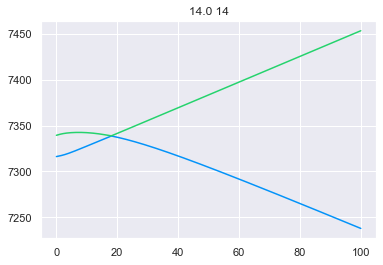

In [99]:
for trace in X010_174.evals_EB[1:3]:
    for i in range(5,15):
        plt.figure(i)
        plt.title(str(Ez[i])+' '+str(i))
        plt.plot(Bz,trace[i,:])

(15.0, 20.0)

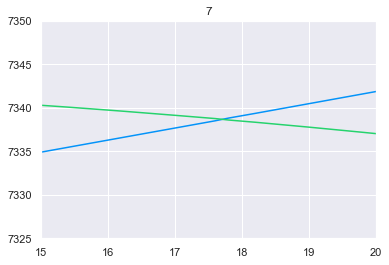

In [115]:
for trace in X010_174.evals_EB[1:3]:
    i=7
    plt.figure(i)
    plt.title(i)
    plt.plot(Bz,trace[i,:])
plt.ylim(7325,7350)
plt.xlim(15,20)

E= 9.0
-1.1102702091037031e-11
-5.2246471038408515e-11
2.391075532015563e-11
-3.3402447474628616e-11
-5.68094737918301e-11
-5.830504828940875e-11
2.073917426681504e-12
-9.178241500151785e-12
-3.791561509203234e-11
-3.3227268159130574e-11
3.376447732517107e-11
-2.4613366900183564e-12
4.633865513525848e-11
2.937119991663906e-11
-8.524486672101261e-12
-1.934882809528915e-11
-4.048944513002084e-11
-5.918210366218091e-12
1.6254220192024604e-11
-3.94353716348661e-11
-6.90716095430588e-11
7.527792278416712e-11
-6.00448302190415e-11
6.839157018490027e-11
4.348743587456738e-12
-5.623743137839199e-11
2.633782081318259e-11
1.270711313949846e-11
-6.759481863127803e-11
-1.8334722629020916e-11
-2.145411626131022e-11
-5.565750638147904e-11
7.884221053799934e-12
-4.5791453961996353e-11
7.39047711917351e-12
-7.956113545759536e-11
6.854866674288473e-11
7.814965341523816e-11
3.9162756371169394e-11
3.378486379546075e-11
-1.1530887356059338e-11
1.2516931935380171e-12
-4.006631137976058e-11
-1.0330458710683

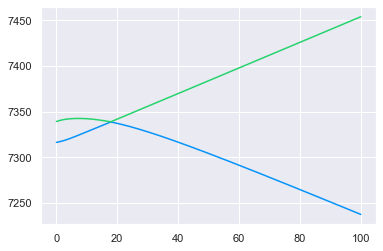

In [120]:
E1 = []
E2 = []
B=np.linspace(0,100,500)
i=9
print('E=',Ez[i])
for _B in B:
    X010_174.eigensystem(Ez[i],_B,set_attr=True)
    evecs = X010_174.evecs0
    print(evecs[1]@evecs[2])
    E1.append(X010_174.evals0[1])
    E2.append(X010_174.evals0[2])
    
plt.plot(B,E1)
plt.plot(B,E2)
# print(X010_174.evals0[1])
# print(X010_174.evals0[2])
# display(Latex(X010_174.gen_state_str(1)))
# display(Latex(X010_174.gen_state_str(2)))

In [68]:
X010_174.eigensystem(Ez[i],28,set_attr=True)

(array([7292.17973, 7339.37772, 7339.65658, 7387.80825, 7392.92561,
        7414.19639]),
 array([[ 0.14299,  0.58164, -0.13144, -0.42118,  0.20264,  0.6368 ],
        [ 0.27946, -0.12795, -0.16607,  0.66608,  0.60163,  0.26894],
        [-0.29505,  0.164  ,  0.48488,  0.48159, -0.43975,  0.475  ],
        [ 0.56415,  0.60697,  0.02088,  0.2832 , -0.25874, -0.40712],
        [-0.05467, -0.08463, -0.82035,  0.17425, -0.49879,  0.19422],
        [ 0.70225, -0.4928 ,  0.21594, -0.1909 , -0.29641,  0.30506]]))

(7325.0, 7350.0)

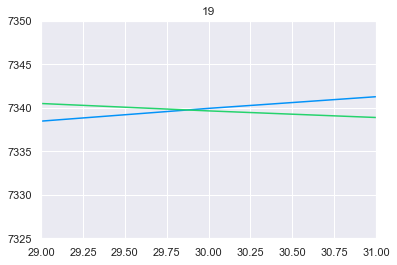

In [79]:
for trace in X010_174.evals_EB[1:3]:
    i=19
    plt.figure(i)
    plt.title(i)
    plt.plot(trace[i,:])
plt.xlim(29,31)
plt.ylim(7325,7350)

E= 75
-2.2624901951928678e-11
-4.019412580547055e-11
5.201367114793243e-11
-7.155959158566816e-11
-3.615424626346453e-11
3.702815831729822e-11
2.8574698163197354e-11
-6.199551982888352e-11
3.697686601356054e-11
-4.2914588549436417e-11
2.105954299835844e-12
-2.0795795641070924e-11
2.0412130319336086e-11
-3.114987434660321e-11
2.1675834738221766e-11
-1.1796853771617322e-10
-2.9016497538059127e-11
-4.032427169953223e-12
-2.228101730894494e-11
-8.942790952204405e-12
3.224965433590299e-11
-5.500280786385758e-12
-2.950422545167086e-11
1.1906101105019218e-12
7.922731221077228e-11
-4.772668371622046e-12
-5.098833855132767e-11
-9.060249078762794e-11
7.118076961187825e-12
-2.572581037085797e-12
-3.551653415811984e-11
-4.532773462129214e-11
-1.8418100378170266e-11
7.279454816710995e-13
5.7817542420401935e-11
4.900947703223579e-11
-3.496967992955291e-11
-4.5638479106990815e-11
-4.289388289002716e-12
-2.6633792393759848e-11
2.961055012296043e-11
9.049151705742275e-11
-3.381987745409987e-11
-3.66569

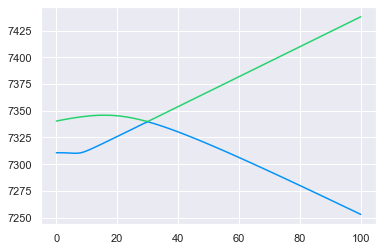

In [82]:
E1 = []
E2 = []
B=np.linspace(0,100,101)
print('E=',75)
for _B in B:
    X010_174.eigensystem(Ez[i],_B,set_attr=True)
    evecs = X010_174.evecs0
    print(evecs[1]@evecs[2])
    E1.append(X010_174.evals0[1])
    E2.append(X010_174.evals0[2])
    
plt.plot(B,E1)
plt.plot(B,E2)
# print(X010_174.evals0[1])
# print(X010_174.evals0[2])
# display(Latex(X010_174.gen_state_str(1)))
# display(Latex(X010_174.gen_state_str(2)))

In [60]:
X010_174.eigensystem(80,30,set_attr=True);
X010_174.write_state(1)
X010_174.write_state(2)

E = 7290.959288990252 MHz

 -0.1544563007 |Λ=-1,N=1,J=0.5,F=1.0,M=1.0> 

 -0.5888558553 |Λ=1,N=1,J=0.5,F=1.0,M=1.0> 

 0.1333386279 |Λ=-1,N=1,J=1.5,F=1.0,M=1.0> 

 0.4126265813 |Λ=1,N=1,J=1.5,F=1.0,M=1.0> 

 -0.2072223548 |Λ=-1,N=1,J=1.5,F=2.0,M=1.0> 

 -0.6311981015 |Λ=1,N=1,J=1.5,F=2.0,M=1.0> 

E = 7293.047310413979 MHz

 -0.0912669593 |Λ=-1,N=1,J=0.5,F=0.0,M=0.0> 

 -0.3971118462 |Λ=1,N=1,J=0.5,F=0.0,M=0.0> 

 -0.1219748515 |Λ=-1,N=1,J=0.5,F=1.0,M=0.0> 

 -0.4186378725 |Λ=1,N=1,J=0.5,F=1.0,M=0.0> 

 -0.1302734973 |Λ=-1,N=1,J=1.5,F=1.0,M=0.0> 

 -0.5113141677 |Λ=1,N=1,J=1.5,F=1.0,M=0.0> 

 -0.2230360627 |Λ=-1,N=1,J=1.5,F=2.0,M=0.0> 

 -0.5618527775 |Λ=1,N=1,J=1.5,F=2.0,M=0.0> 



In [6]:
t0 = time.process_time()
Eslices = X010_174.EB_grid(Ez,Bz,PTV=True,E_or_B_first='B',output=True)
t1 = time.process_time()
elapsed = t1 - t0
print(elapsed, 'sec')

NameError: name 'method' is not defined

In [ ]:
from matplotlib.colors import TwoSlopeNorm
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
for i in range(len(X010_174.evals0)):
    plt.figure()
    plt.pcolormesh(*mesh,X010_174.PTV_EB[i],shading='auto',cmap='bwr')#,norm=TwoSlopeNorm(0))
    plt.colorbar()
    plt.title('Eigenstate {}'.format(i))
    plt.xlabel('E (V/cm)')
    plt.ylabel('B (G)')

In [ ]:
#from matplotlib.colors import TwoSlopeNorm
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
for i in range(len(X010_174.evals0)):
    plt.figure()
    plt.pcolormesh(*mesh,X010_174.evals_EB[i],shading='auto',cmap='bwr')
    plt.colorbar()
    plt.title('Eigenstate {}'.format(i))
    plt.xlabel('E (V/cm)')
    plt.ylabel('B (G)')

In [53]:
X010_174.ZeemanMap(Bz,0.1)

In [37]:
H_PTV = X010_174.library.PTV_builders[X010_174.iso_state](X010_174.q_numbers)

In [54]:
X010_174.evecs_B[0][3]@H_PTV@X010_174.evecs_B[0][3]

0.0005278550022499856

In [55]:
np.diagonal(X010_174.evecs_B[0]@H_PTV@X010_174.evecs_B[0].T)

array([ 0.00044,  0.     , -0.00044,  0.00053,  0.00026, -0.     ,
       -0.00026, -0.00053, -0.00046, -0.     ,  0.00046, -0.00053,
       -0.00026,  0.     ,  0.00026,  0.00053,  0.00068,  0.     ,
       -0.00068, -0.     , -0.00069, -0.     ,  0.00069,  0.     ])

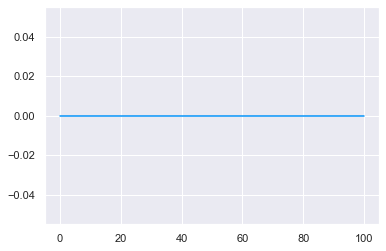

In [11]:
plt.figure()
plt.plot(Bz,X010_174.PTV_EB[10,0,:])

In [57]:
idx = X010_174.select_q({'J':0.5})

In [58]:
X010_174.ZeemanMap(Bz,0)

In [59]:
X010_174.StarkMap(Ez,1e-8)

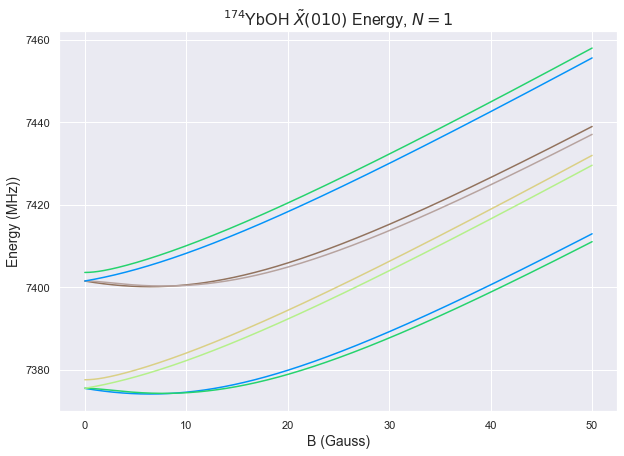

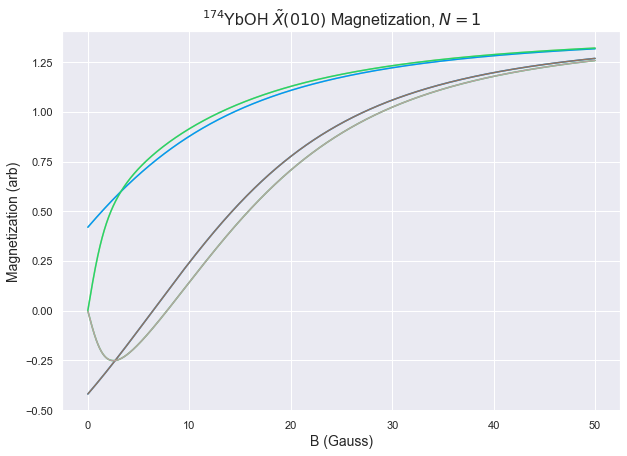

In [60]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.evals_B.T[idx]):
    plt.plot(Bz,trace)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Energy, $N=1$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.evals_B.T[idx]):
    grad = np.gradient(trace)
    plt.plot(Bz,grad/(Bz[1]-Bz[0]))
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Magnetization (arb)',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Magnetization, $N=1$',fontsize=16);

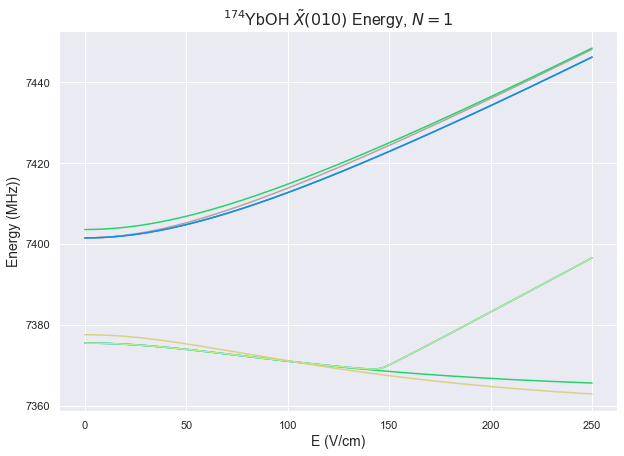

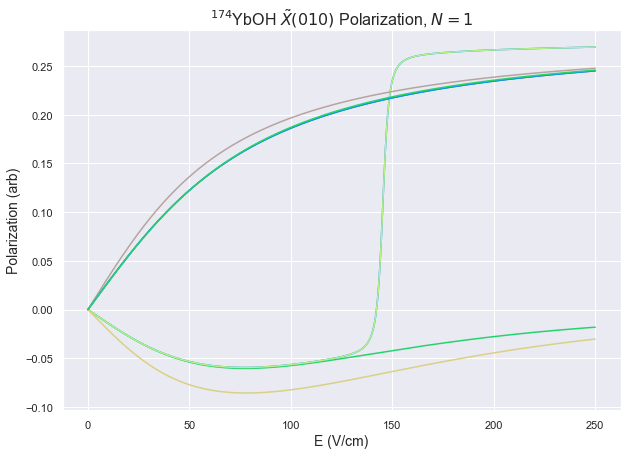

In [61]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.evals_E.T[idx]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Energy, $N=1$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.evals_E.T[idx]):
    grad = np.gradient(trace)
    plt.plot(Ez,grad/(Ez[1]-Ez[0]))
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Polarization (arb)',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Polarization, $N=1$',fontsize=16);

In [134]:
X010_174.PTV_Map('EDM','E')

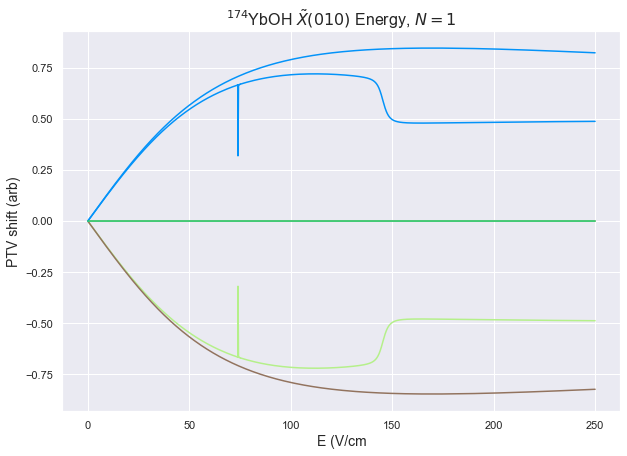

In [135]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.PTV_E.T[idx]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm',fontsize=14)
plt.ylabel('PTV shift (arb)',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Energy, $N=1$',fontsize=16);

In [64]:
X010_174.g_eff_Map('E');

array([[-0.80013, -0.00002,  0.80021, ...,  0.00001,  0.29964,  0.     ],
       [-0.80024,  0.     ,  0.80021, ..., -0.00003,  0.29962, -0.00003],
       [-0.80022,  0.00002,  0.80015, ..., -0.00001,  0.29962, -0.00002],
       ...,
       [-0.98974, -0.00001,  0.98978, ..., -0.00003,  0.81982,  0.00001],
       [-0.98969,  0.00003,  0.98973, ..., -0.00001,  0.81988,  0.00001],
       [-0.9898 , -0.00003,  0.98969, ..., -0.00001,  0.81988, -0.00002]])

(0.0001, -0.0001)

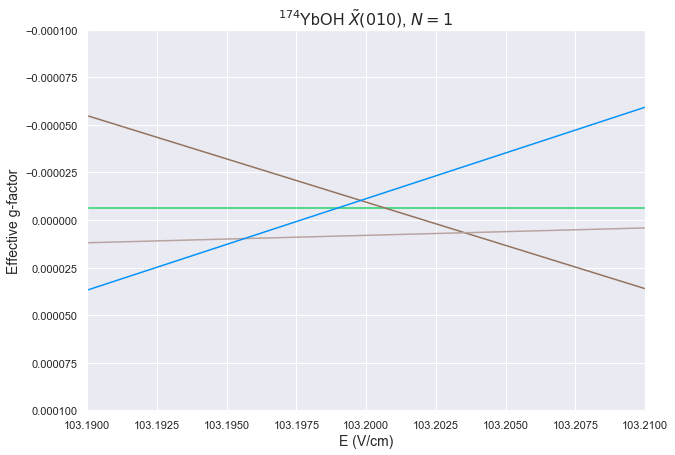

In [71]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.g_eff_E.T[idx]):
    plt.plot(Ez,X010_174.g_eff_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Effective g-factor',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$, $N=1$',fontsize=16);
plt.xlim(103.19,103.21)
plt.ylim(0.0001,-0.0001)

In [136]:
X010_174.ZeemanMap(Bz,103)

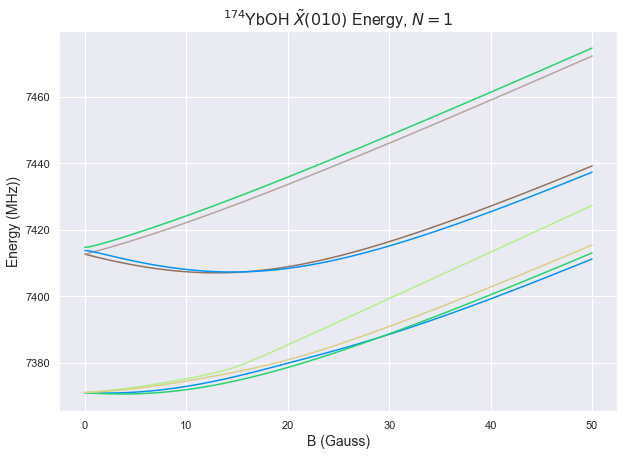

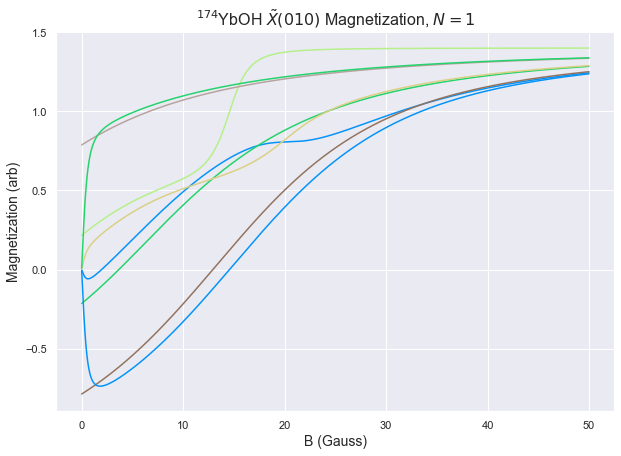

In [81]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.evals_B.T[idx]):
    plt.plot(Bz,trace)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Energy, $N=1$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.evals_B.T[idx]):
    grad = np.gradient(trace)
    plt.plot(Bz,grad/(Bz[1]-Bz[0]))
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Magnetization (arb)',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Magnetization, $N=1$',fontsize=16);

In [82]:
X010_174.g_eff_Map('B');

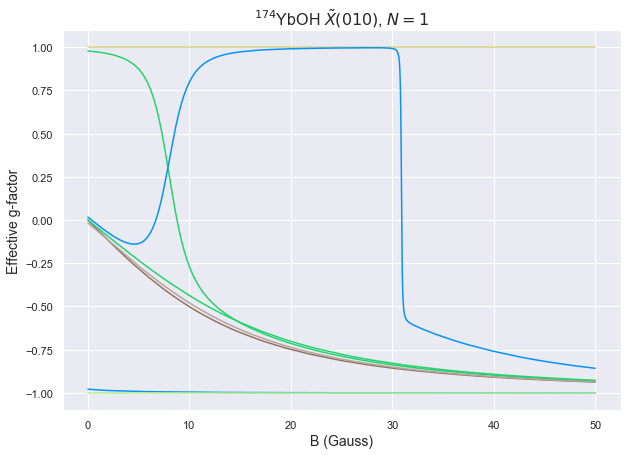

In [110]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.g_eff_B.T[idx]):
    plt.plot(Bz,X010_174.g_eff_B.T[i])
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Effective g-factor',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$, $N=1$',fontsize=16);

In [138]:
X010_174.PTV_Map('EDM','B');

(0, 2)

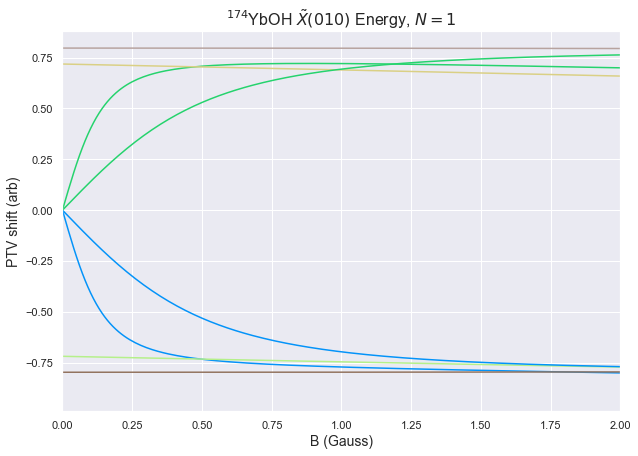

In [140]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.PTV_B.T[idx]):
    plt.plot(Bz,trace)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('PTV shift (arb)',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Energy, $N=1$',fontsize=16);
plt.xlim(0,2)

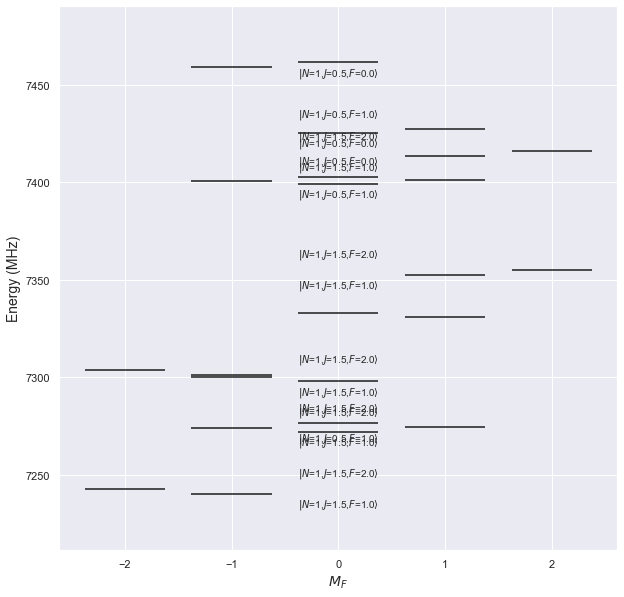

In [116]:
X010_174.display_levels(100,40,'F',label_q = ['N','J','F'],alt_label=True)

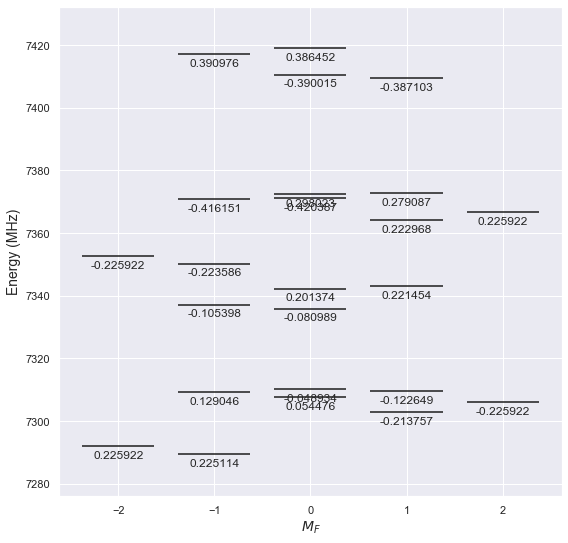

In [334]:
X010_174.display_PTV(100,5,'EDM')

In [197]:
def PTV_slope(self,Ez,Bz,step=1e-3):
    evals0,evecs0 = self.eigensystem(Ez,Bz,set_attr=False)
    evals1,evecs1 = self.eigensystem(Ez,Bz+step,set_attr=False)
    order = state_ordering(evecs0,evecs1,round=self.round)
    evecs1_ordered = evecs1[order,:]
    evals1_ordered = evals1[order]
    PTV_slope = []
    H_PTV = self.library.PTV_builders[self.iso_state](self.q_numbers)
    for E0,E1 in zip(evecs0,evecs1_ordered):
        E_PTV0 = E0@H_PTV@E0
        E_PTV1 = E1@H_PTV@E1
        PTV_slope.append((E_PTV1-E_PTV0))
    PTV_slope = np.array(PTV_slope)
    return PTV_slope

def state_ordering(evecs_old,evecs_new,round=6):
    overlap = abs(np.round(evecs_old@evecs_new.T,round))     #Essentially a matrix of the fidelities: |<phi|psi>|
    #calculate trace distance
    # for o in overlap:
    #     for _o in o:
    #         if (_o>1):
    #             print('OVERLAP BIGGER THAN 1', _o)
    trace_dist = np.sqrt(abs(1-np.square(overlap)))
    ordering = np.array([trace_dist[i,:].argmin() for i in range(len(evecs_old))])
    return ordering

def PTV_slope_Map(self,E_or_B='E',step=1e-3):
    if E_or_B=='E':
        if self.evecs_E is None:
            print('Run StarkMap first')
            return None
        PTV_slope_E = []
        for i,evecs in enumerate(self.evecs_E):
            slope = PTV_slope(self, self.Ez[i],self._Bz,step=step)
            PTV_slope_E.append(slope)
        PTV_slope_E = np.array(PTV_slope_E)
        return PTV_slope_E
    else:
        if self.evecs_B is None:
            print('Run ZeemanMap first')
            return None
        PTV_slope_B = []
        for i,evecs in enumerate(self.evecs_B):
            slope = PTV_slope(self, self.Bz[i],self._Ez,step=step)
            PTV_slope_B.append(slope)
        PTV_slope_B = np.array(PTV_slope_B)
        return PTV_slope_B

In [198]:
PTV_slope_E = PTV_slope_Map(X010_174,'E',step=0.1)

(90, 105)

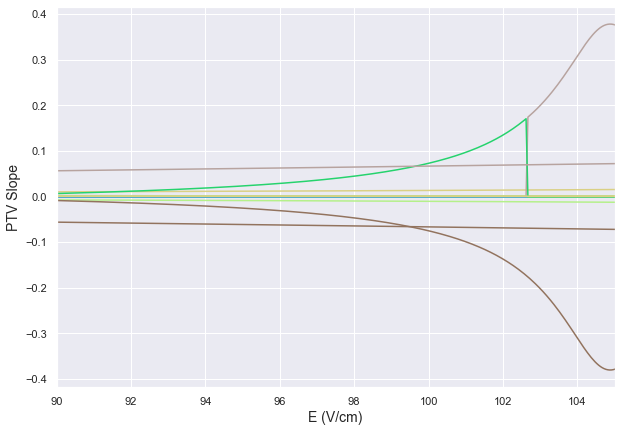

In [201]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(PTV_slope_E.T):
    plt.plot(Ez,PTV_slope_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('PTV Slope',fontsize=14)
plt.xlim(90,105)

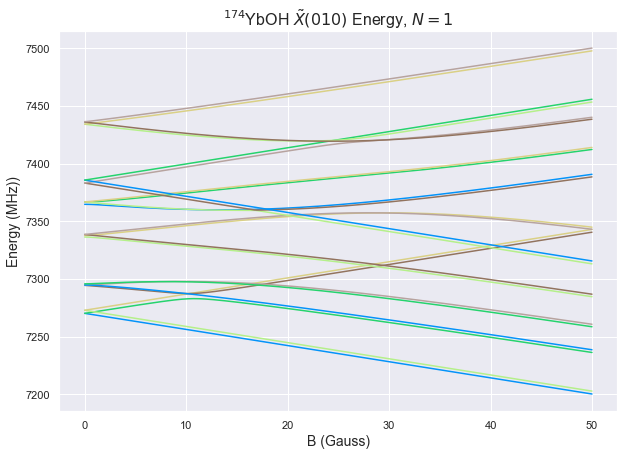

In [34]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.evals_B.T):
    plt.plot(Bz,trace)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Energy, $N=1$',fontsize=16);

In [54]:
X010_174.PTV_Map('EDM',plot=False)

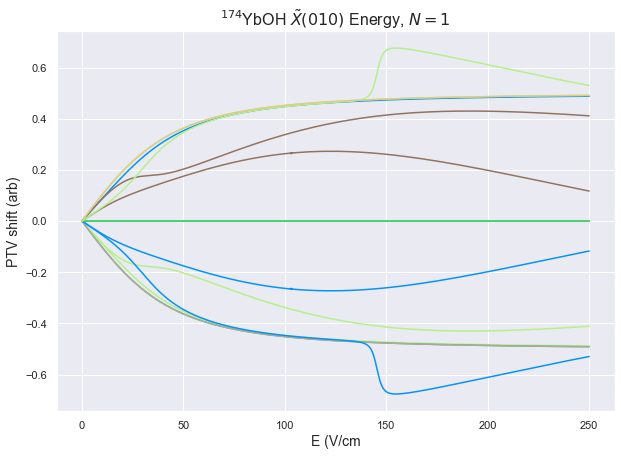

In [10]:
X000_173 = YbOHLevels.initialize_state('173','X010',[1],M_values = 'all',I=[5/2,1/2],S=1/2,round=6)

In [11]:
Gidx = {2:X000_173.select_q({'G':2,'N':1}),3:X000_173.select_q({'G':3,'N':1})}

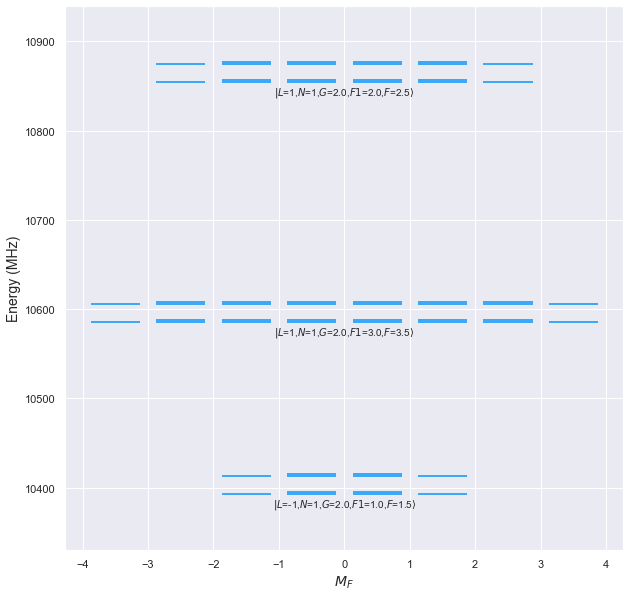

In [12]:
X000_173.display_levels(1e-8,1e-8,'F1',idx = Gidx[2])

In [13]:
Bz = np.linspace(0.001,200,3000)
Ez = np.linspace(0.0,5000,5000)

In [14]:
X000_173.ZeemanMap(Bz,0,plot=False)

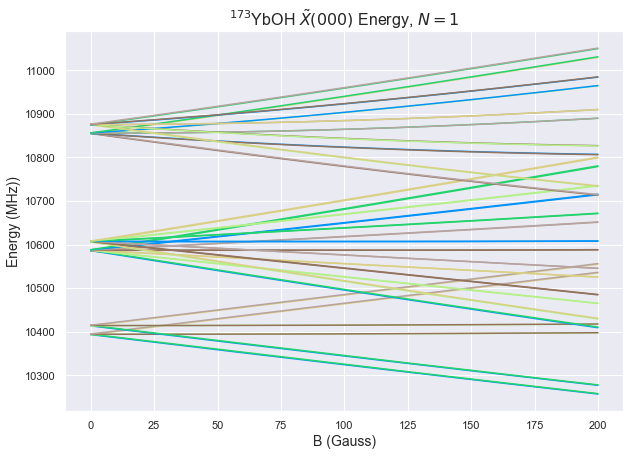

In [15]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X000_173.evals_B.T[Gidx[2]]):
    plt.plot(Bz,trace)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(000)$ Energy, $N=1$',fontsize=16);

In [16]:
X000_173.StarkMap(Ez,1e-8)

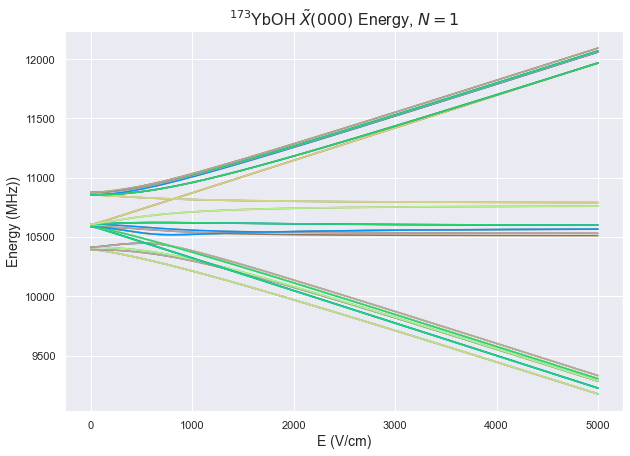

In [17]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X000_173.evals_E.T[Gidx[2]]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(000)$ Energy, $N=1$',fontsize=16);

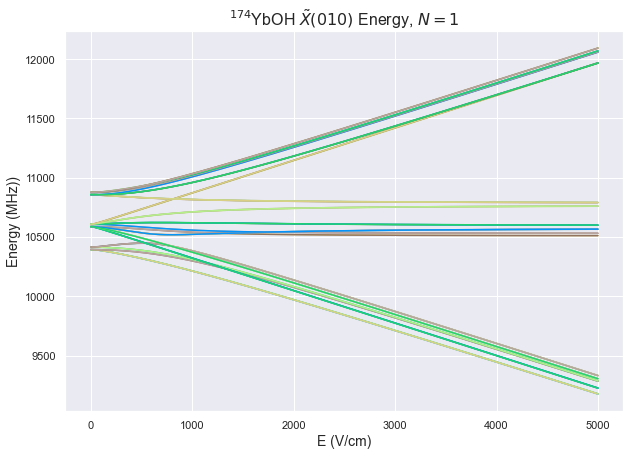

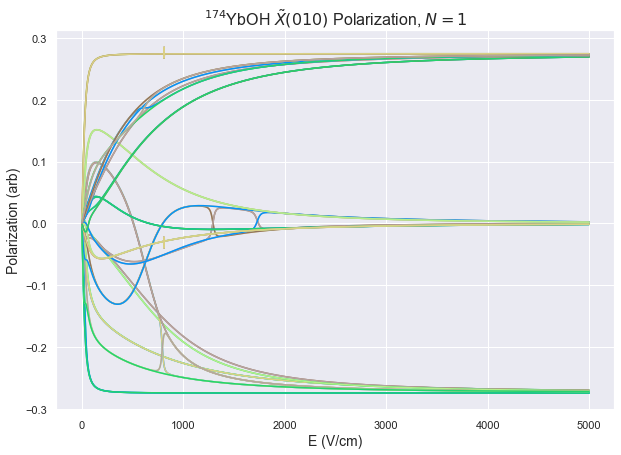

In [67]:
idx=Gidx[2]
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X000_173.evals_E.T[idx]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Energy, $N=1$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X000_173.evals_E.T[idx]):
    grad = np.gradient(trace)
    plt.plot(Ez,grad/(Ez[1]-Ez[0]))
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Polarization (arb)',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Polarization, $N=1$',fontsize=16);

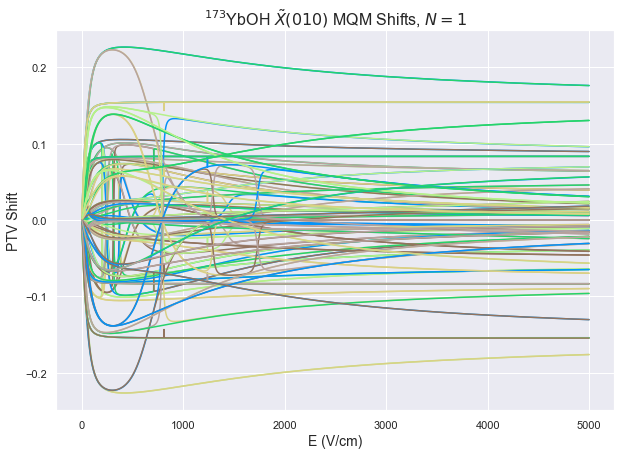

In [69]:
X000_173.PTV_Map('MQM','E',plot=True);

In [33]:
FGidx = {2:X000_173.select_q({'G':2,'N':1,'F1':1}),3:X000_173.select_q({'G':3,'N':1,'F1':2})}

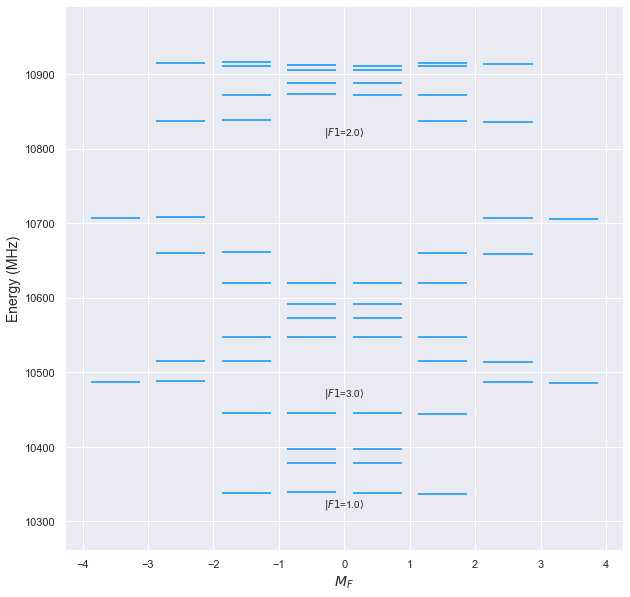

In [66]:
X000_173.display_levels(400,0.65,'F1',label_q = ['F1','M'],idx = Gidx[2])

(10430.0, 10450.0)

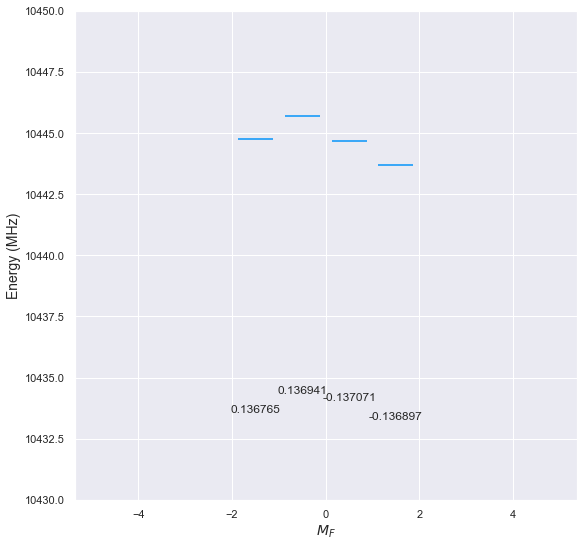

In [65]:
X000_173.display_PTV(400,0.65,'MQM')
plt.ylim(10430,10450)

In [ ]:
X000_173.display_levels(400,0.65,'F1',label_q = ['F1','M'],idx = Gidx[2])
plt.ylim(10440,10450)

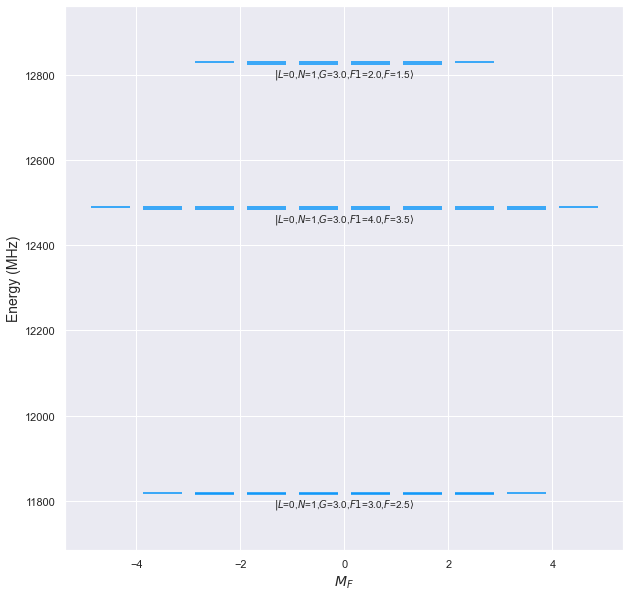

In [12]:
X000_173.display_levels(1e-8,1e-8,'F1',idx = Gidx[3])

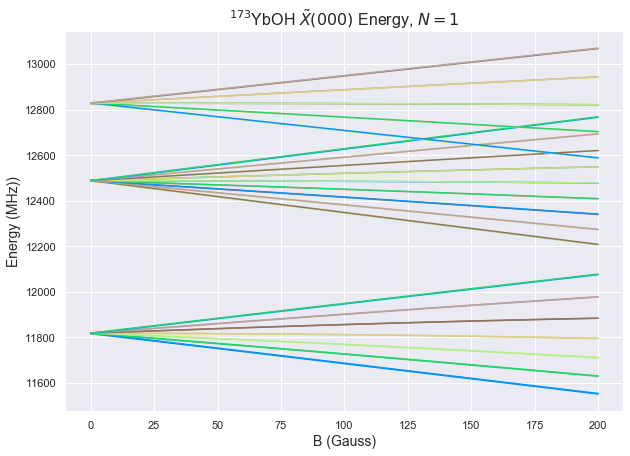

In [32]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X000_173.evals_B.T[Gidx[3]]):
    plt.plot(Bz,trace)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(000)$ Energy, $N=1$',fontsize=16);

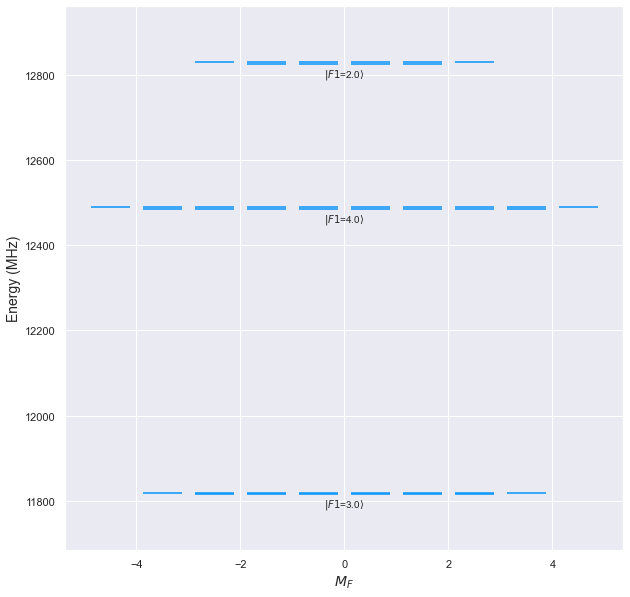

In [17]:
X000_173.display_levels(100,1e-8,'F1',label_q = ['F1','M'],idx = Gidx[3])

In [19]:
Bz = np.linspace(0.001,200,3000)
Ez = np.linspace(0.0,2000,5000)

In [20]:
X000_171 = YbOHLevels.initialize_state('171','X000',[1],M_values = 'all',I=[1/2,1/2],S=1/2,round=6)

In [21]:
Gidx = {0:X000_171.select_q({'G':0}),1:X000_171.select_q({'G':1})}

In [22]:
X000_171.ZeemanMap(Bz,0,plot=False)

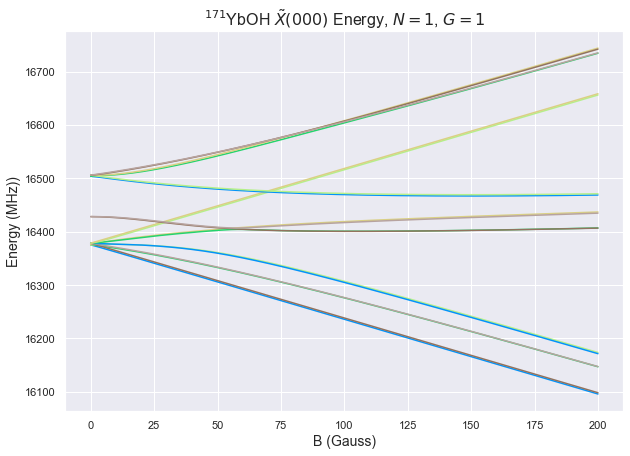

In [23]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X000_171.evals_B.T[Gidx[1]]):
    plt.plot(Bz,trace)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{171}$YbOH $\tilde{X}(000)$ Energy, $N=1$, $G=1$',fontsize=16);

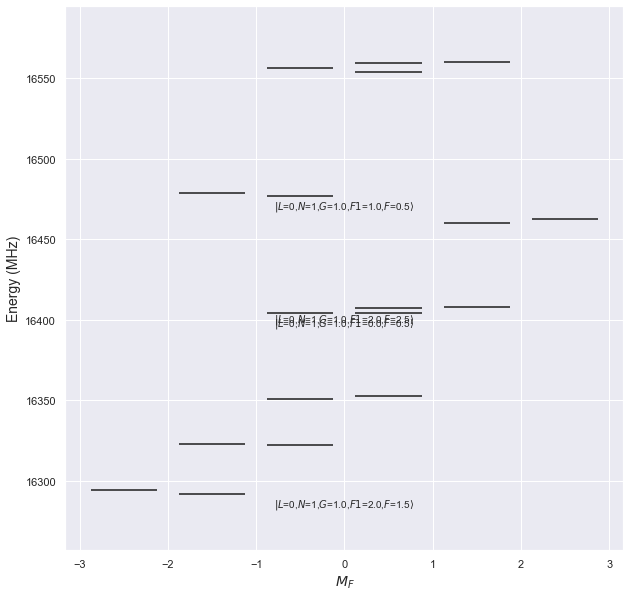

In [48]:
X000_171.display_levels(1e-8,60,'F1',idx = Gidx[1])

In [3]:
X010_173 = YbOHLevels.initialize_state('173','X010',[1],M_values = 'all',I=[5/2,1/2],S=1/2,round=6)

In [4]:
Gidx = {2:X010_173.select_q({'G':2}),3:X010_173.select_q({'G':3})}

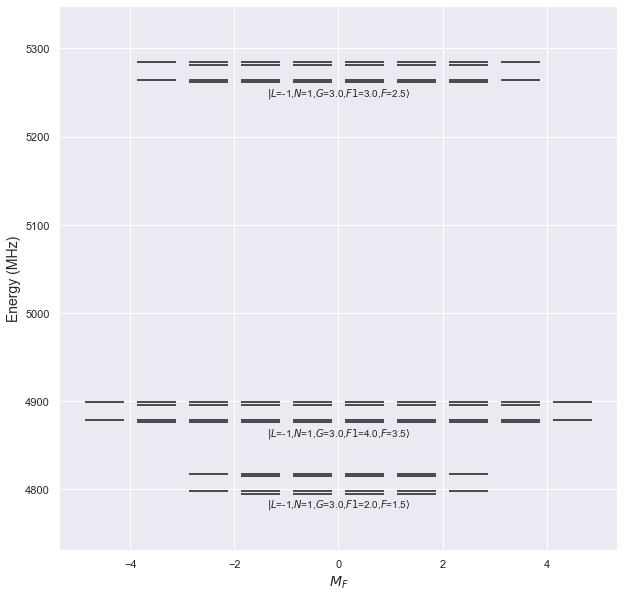

In [22]:
X010_173.display_levels(1e-8,1e-8,'F1',idx = Gidx[3])

In [ ]:
Bz = np.linspace(0.001,200,3000)
Ez = np.linspace(0.0,200,5000)

In [8]:
X010_173.ZeemanMap(Bz,0,plot=False)

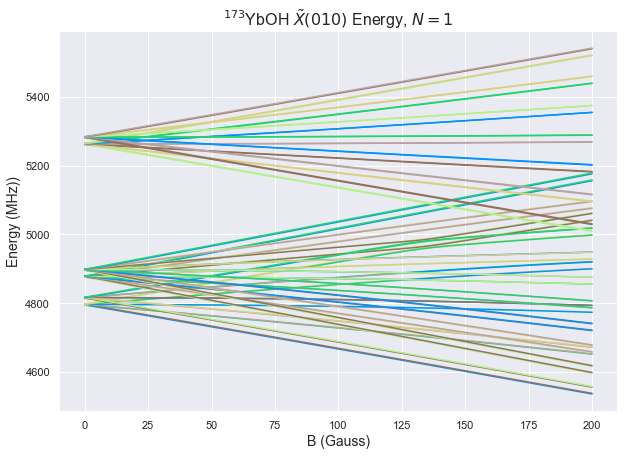

In [23]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_173.evals_B.T[Gidx[3]]):
    plt.plot(Bz,trace)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(010)$ Energy, $N=1$',fontsize=16);

In [11]:
X010_173.StarkMap(Ez,1e-8,plot=False)

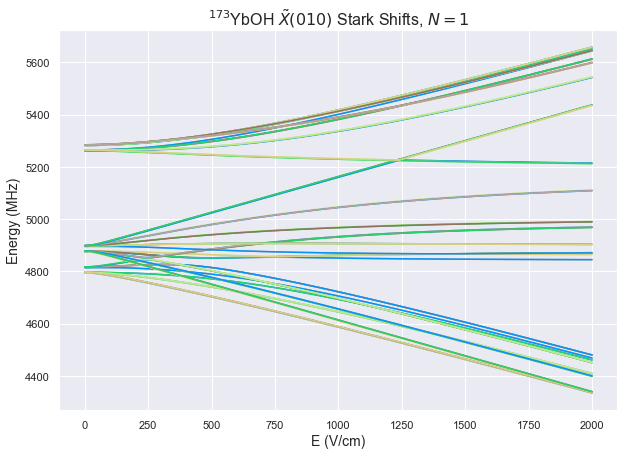

In [21]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_173.evals_E.T[Gidx[3]]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(010)$ Stark Shifts, $N=1$',fontsize=16);

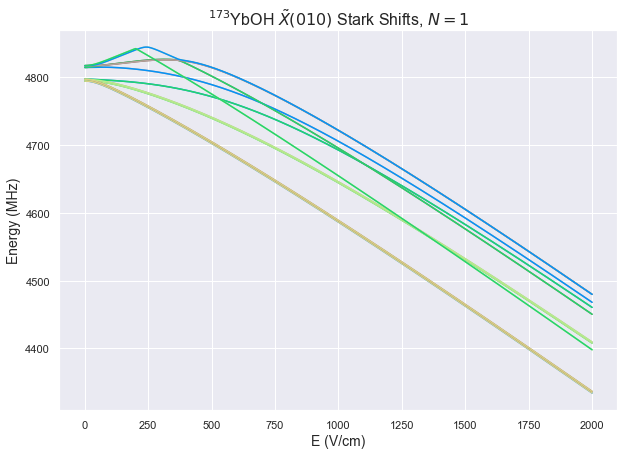

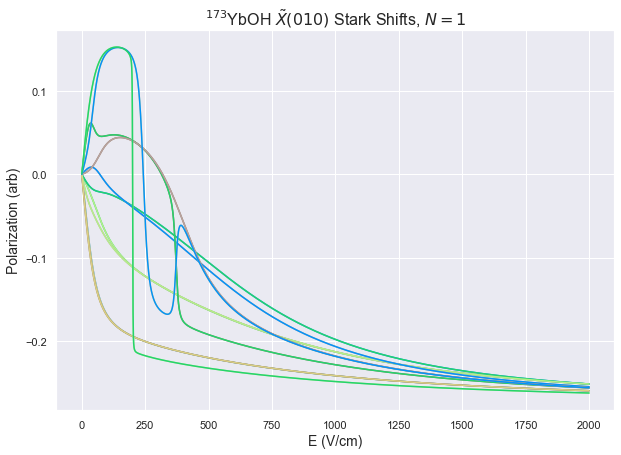

In [24]:
idx = X010_173.select_q({'G':3,'F1':2})

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_173.evals_E.T[idx]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(010)$ Stark Shifts, $N=1$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_173.evals_E.T[idx]):
    grad = np.gradient(trace)
    plt.plot(Ez,grad/(Ez[1]-Ez[0]))
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Polarization (arb)',fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(010)$ Stark Shifts, $N=1$',fontsize=16);

In [9]:
A000_173 = YbOHLevels.initialize_state('173','A000',[1],M_values = 'pos',I=[5/2,1/2],S=1/2,round=6)

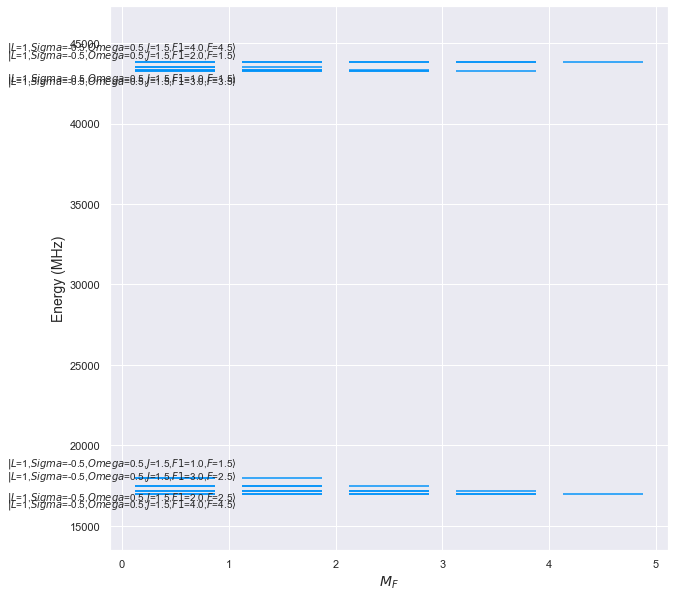

In [13]:
A000_173.display_levels(0,0,'F1',idx = A000_173.select_q({'J':1.5}))